In [30]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../../../src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

In [7]:
def return_topology(N):
    topology_parameter = {
        "Nx"    : N,
        "Ny"    : N,
        "Nz"    : 1,
        "e_pos" :   [[0,0,0], [int((N-1)/2),0,0], [N-1,0,0],
                    [0,int((N-1)/2),0], [0,N-1,0], [N-1,int((N)/2),0],
                    [int((N)/2),(N-1),0], [N-1,N-1,0]]
    }
    return topology_parameter

def return_sim_info(jumps_per_batch=1000, min_batches=1, eq_steps=100000, max_jumps=10000000):
    sim_dic = {
        'error_th'          : 0.05,
        'max_jumps'         : max_jumps,
        'eq_steps'          : eq_steps,
        'jumps_per_batch'   : jumps_per_batch,
        'kmc_counting'      : False,
        'min_batches'       : min_batches
    }
    return sim_dic

def return_voltages(V_min, V_max, N_voltages=100, seed=0):

    rs = np.random.RandomState(seed)

    return rs.uniform(V_min, V_max, size=(N_voltages,9))

In [8]:
N           = 7
voltages    = return_voltages(-0.05, 0.05)
topology    = return_topology(N)

results     = {}

for jumps_per_batch in [1,10,100,1000,10000]:

    sim_dic     = return_sim_info(jumps_per_batch=jumps_per_batch)
    sim_class   = nanonets.simulation(network_topology='cubic', topology_parameter=topology)
    sim_class.run_const_voltages(voltages=voltages, target_electrode=7, sim_dic=sim_dic, save_th=0.1)

    results[jumps_per_batch] = sim_class.return_output_values()

In [28]:
df      = pd.DataFrame()

for jumps_per_batch in [1,10,100,1000,10000]:

    df[jumps_per_batch] = results[jumps_per_batch][:,2]

,1,10,100,1000,10000
0,-177.896736,-139.853343,-135.476525,-138.213046,-138.333461
1,58.530523,58.950328,56.783800,57.257364,58.152432
2,-40.522137,-49.244563,-48.612042,-39.661505,-47.487662
3,260.458233,235.655722,223.589801,252.759934,233.018930
4,290.369193,249.237828,257.150652,293.458882,269.248541
...,...,...,...,...,...
95,147.041726,240.587297,224.337637,234.463636,226.303486
96,729.561819,254.191806,269.288444,245.677997,237.482177
97,-0.314858,-0.267156,-0.268071,-0.248300,-0.287208
98,-806.358033,-182.202846,-222.059459,-216.312312,-198.376550


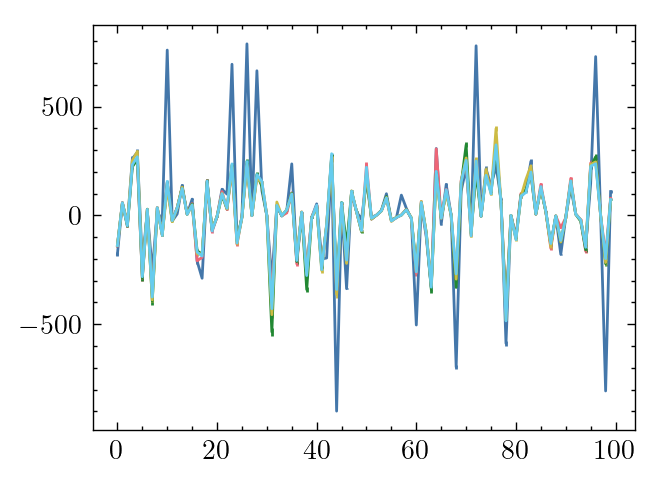

In [18]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for jumps_per_batch in [1,10,100,1000,10000]:

        ax.errorbar(np.arange(100), results[jumps_per_batch][:,2], results[jumps_per_batch][:,3])
    
    ax.set_ylabel("$I$ [pA]")
    ax.set_xlabel("data")

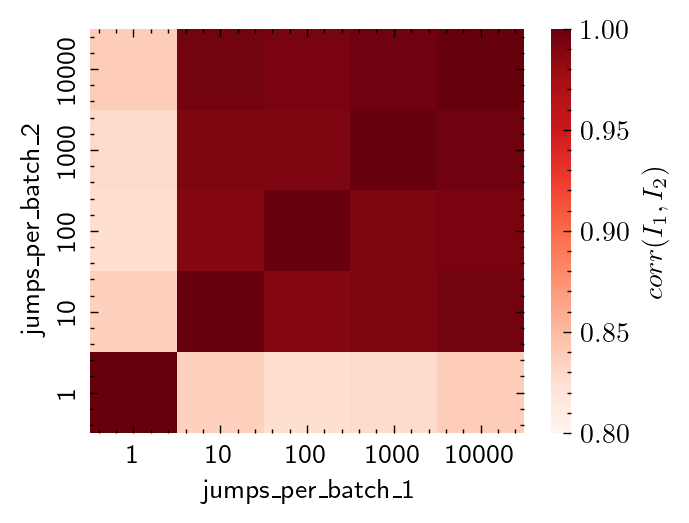

In [40]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax  = sns.heatmap(df.corr(), ax=ax, cmap='Reds', cbar_kws={'label':'$corr(I_1,I_2)$'}, vmin=0.8)
    
    ax.set_xlabel('jumps_per_batch_1')
    ax.set_ylabel('jumps_per_batch_2')
    ax.invert_yaxis()

<ErrorbarContainer object of 3 artists>

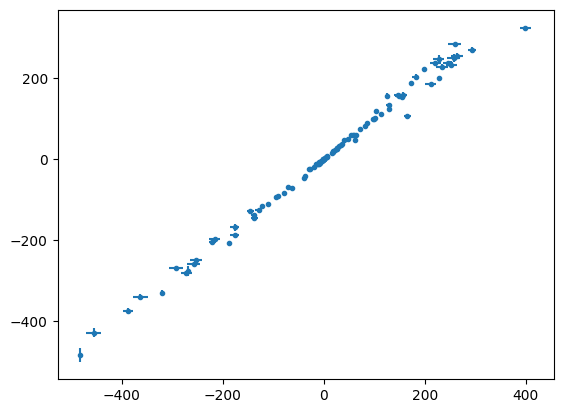

In [26]:
jumps_per_batch1    = 1000
jumps_per_batch2    = 10000

plt.errorbar(results[jumps_per_batch1][:,2], results[jumps_per_batch2][:,2], results[jumps_per_batch2][:,3], results[jumps_per_batch1][:,3], fmt='.')

In [36]:
N           = 7
voltages    = return_voltages(-0.05, 0.05)
topology    = return_topology(N)

results2     = {}

for min_batches in [1,2,4,6,8,10]:

    sim_dic     = return_sim_info(min_batches=min_batches)
    sim_class   = nanonets.simulation(network_topology='cubic', topology_parameter=topology)
    sim_class.run_const_voltages(voltages=voltages, target_electrode=7, sim_dic=sim_dic, save_th=0.1)

    results2[min_batches] = sim_class.return_output_values()

In [38]:
df2      = pd.DataFrame()

for min_batches in [1,2,4,6,8,10]:

    df2[min_batches] = results2[min_batches][:,2]

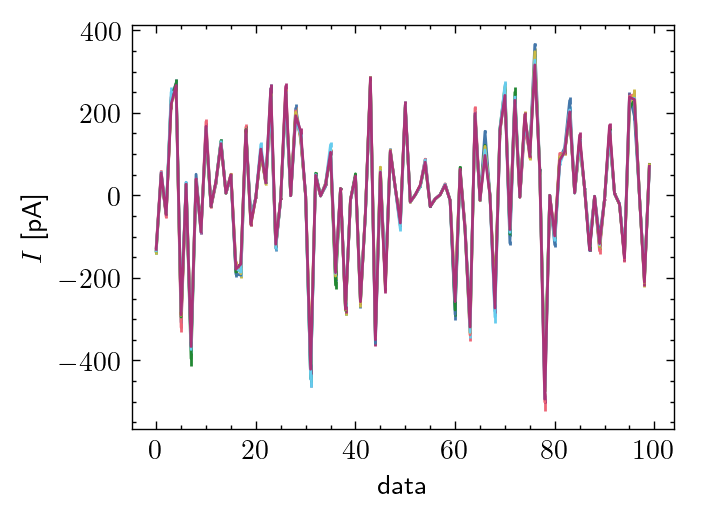

In [37]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for min_batches in [1,2,4,6,8,10]:

        ax.errorbar(np.arange(100), results2[min_batches][:,2], results2[min_batches][:,3])
    
    ax.set_ylabel("$I$ [pA]")
    ax.set_xlabel("data")

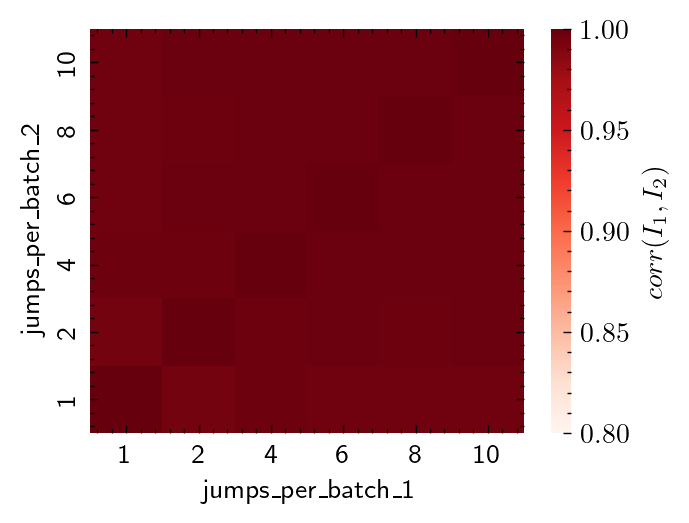

In [41]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax  = sns.heatmap(df2.corr(), ax=ax, cmap='Reds', cbar_kws={'label':'$corr(I_1,I_2)$'}, vmin=0.8)
    
    ax.set_xlabel('jumps_per_batch_1')
    ax.set_ylabel('jumps_per_batch_2')
    ax.invert_yaxis()